<a href="https://colab.research.google.com/github/onni-Q/workshop_notebooks/blob/main/Week3_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please run the cell below to set up the environment.

**To get a complete, please complete 1 of the 2 parts (unsupervised and supvised machine learning) fully and the other at least 50%. The section 'The Workings of Decision Trees' is entirely optional.**

In [305]:
#Keep cell
%%capture

import os

try:
  import learntools.core
  from learntools.core import binder
  binder.bind(globals())
except:
  !pip install git+https://github.com/Kaggle/learntools.git
  import learntools.core
  from learntools.core import binder
  binder.bind(globals())

try:
  import palettable
except:
  !pip install palettable
  import palettable


if not(os.path.exists('ml_workshop_tests.py')):
  print('Downloading ml_workshop_tests.py\n')
  !wget https://raw.githubusercontent.com/goto4711/cdai/refs/heads/main/ml_workshop_tests.py


if not(os.path.exists('114_congress.csv')):
  print('Downloading 114_congress.csv\n')
  !wget https://raw.githubusercontent.com/goto4711/cdai/main/114_congress.csv

if not(os.path.exists('spotify-dataset.csv')):
  print('Downloading spotify-dataset.csv\n')
  !wget https://raw.githubusercontent.com/goto4711/cdai/refs/heads/main/spotify-dataset.csv

if not(os.path.exists('CDAIML.py')):
  print('Downloading CDAIML.py\n')
  !wget https://raw.githubusercontent.com/goto4711/cdai/refs/heads/main/CDAIML.py

from ml_workshop_tests import *
from CDAIML import display_youtube

In [306]:
from ipywidgets import Widget
Widget.get_manager_state()

{'version_major': 2,
 'version_minor': 0,
 'state': {'2d3cec543dc54790bebd28af3544ad47': {'model_name': 'LayoutModel',
   'model_module': '@jupyter-widgets/base',
   'model_module_version': '1.2.0',
   'state': {'_model_module': '@jupyter-widgets/base',
    '_model_module_version': '1.2.0',
    '_model_name': 'LayoutModel',
    '_view_count': None,
    '_view_module': '@jupyter-widgets/base',
    '_view_module_version': '1.2.0',
    '_view_name': 'LayoutView',
    'align_content': None,
    'align_items': None,
    'align_self': None,
    'border': None,
    'bottom': None,
    'display': None,
    'flex': None,
    'flex_flow': None,
    'grid_area': None,
    'grid_auto_columns': None,
    'grid_auto_flow': None,
    'grid_auto_rows': None,
    'grid_column': None,
    'grid_gap': None,
    'grid_row': None,
    'grid_template_areas': None,
    'grid_template_columns': None,
    'grid_template_rows': None,
    'height': None,
    'justify_content': None,
    'justify_items': None,
  

In today's workshop, we focus on real-life social and cultural datasets, which often lack the quality to be processed easily. The kind of social and cultural data we are dealing with is vast and unorganized, which makes organizing it for analysis no easy task. In reality, you will spend most of your time on working through such data challenges.

In this workshop, you will practice once more: cleaning real-world data, applying k-means clustering for exploratory analysis in another context and implementing decision trees and random forests for classification. And, you will practice more programming with Gemini.

We start by exploring political and social community data using clustering we know from the lecture. It is very effective and easy to use. We will gain some real insights about US politics as well as communities in social-networking sites. Next to this unsupervised-learning task, we will go more into the details of particular supervised learning that is widely used in the second part of the workshop.

First load all the standard Pandas, etc. Python libraries, which should be familiar to you.

Run the cell below.

In [307]:
#Keep cell

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Unsupervised Machine Learning with Clustering

In the first part, we dig deeper into digital methodologies and data exploration using a particular method called clustering, which is closely related to the understanding of political and social communities. We rely on our trusted k-means clustering to explore political voting behaviour.

As a reminder, k-means tries to develop clusters by
1. initialising a pre-defined number (k) of randomly chosen centroids in the feature space. Centroids are simply the centre points of clusters.
1. The algorithm assigns each observation to the cluster with the closest centroid.
1. Based on how balanced this assignment is, the centroids are recalculated and steps 1 and 2 are repeated until the algorithm balances out.

We will use k-means to understand voting behaviour in the US senate. We chose a time now long ago, when the Senate was less partisan, as we would like to investigate voting behaviour that crosses party lines. The data is a subset of the data from https://www.dataquest.io/blog/k-means-clustering-us-senators/.

Please, run the cell below to create the `congress_114` dataframe, which contains the voting behaviour of 114th US Senate. According to Wikipedia (https://en.wikipedia.org/wiki/114th_United_States_Congress), the 114th Congress met in Washington, D.C. from 3 January 2015 to 3 January 2017, during the final two years of Barack Obama's presidency.

The 2014 elections gave the Republicans control of the Senate and control of both houses of Congress for the first time since the 109th Congress. With 247 seats in the House of Representatives and 54 seats in the Senate, this Congress began with the largest Republican majority since the 71st Congress of 1929-1931. There are 23 Democrats, 1 Independent and 33 Republicans in our dataset. As said, this does not represent the full 114th congress but a sample.

Run the cell below.

In [308]:
#Keep cell

congress_114 = pd.read_csv("114_congress.csv")

### Data Preparation

To warm up, please check the first five entries of the dataset. It contains the name of a particular senator, their party and home state as well as for each bill whether the senator voted for a bill (1) or against it (0). Check out the first 5 rows of `congress_114` with `head()`.

In [309]:
congress_114.head(5)

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
0,0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Run the next cell to get a hint and finally the solution. You know these cells by now, and we will not introduce them anymore.

In [310]:
q0.hint()
q0.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the .head() method to display the first few rows of a DataFrame. This helps you understand the structure and content of your data. Try: dataframe_name.head(n) where n is the number of rows to display.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
congress_114.head(5)
```

Next check the last five records. You know how of course ...

You will see that the last record contains lots of NaN values, which stand in Python for missing values. This is the voting record of a senator who was not able to vote. In real-life datasets, you will see quite a few of these kinds of records - maybe because they never existed or they were not recorded in the first place, etc.

In [311]:
q1.check()
#q1.hint()
#q1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

As we have already learned, there are many strategies to deal with these kinds of missing records or 'dirty' data. Here, we will use the brute-force version and simply remove it from the dataset. It is only one record and is completely missing. So, removing these records should be safe.

First check that there is really only one record by displaying all null entries in the dataset. Run `congress_114[congress_114.isnull().any(axis=1)]`. `isnull()` checks for NaN entries and `any(axis=1)` applies this to all columns.

In [312]:
congress_114[congress_114.isnull().any(axis=1)]

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
57,57,Markey,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That's only one record missing, and senator 'Markey' has not voted at all. This makes us confident that we can just delete them ...

Remove the record. The easiest is to simply remove all the records with NaN values. Pandas has a function for that called `dropna()`. Apply it to `congress_114`.

In [313]:
congress_114 = congress_114.dropna()

In [314]:
q2.check()
q2.hint()
q2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the .dropna() method to remove rows containing missing values (NaN). This is important for cleaning your data before analysis. Remember to assign the result back: df = df.dropna()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
congress_114 = congress_114.dropna()
```

Check the last 5 elements again to make sure that the observation with NaN values (of the senator who missed votes) is really gone.

In [315]:
congress_114.tail()

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
52,52,Klobuchar,D,MN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
53,53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
54,54,Leahy,D,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
55,55,Lee,R,UT,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0
56,56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


Try to get a quick overview of the dataset and 'describe' it with `congress_114.describe()`.

In [316]:
congress_114.describe()

,index,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.00000,57.000000,57.000000,57.000000
mean,28.000000,0.263158,0.614035,0.561404,0.947368,0.578947,0.385965,0.578947,1.0,0.543860,0.578947,0.368421,0.45614,0.526316,0.438596,0.315789
std,16.598193,0.434097,0.491150,0.500626,0.225282,0.498117,0.491150,0.498117,0.0,0.493536,0.479857,0.486664,0.50250,0.503745,0.500626,0.468961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,42.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


This has not produced very useful outputs. Check the column types with `congress_114.dtypes` to understand why.

In [317]:
congress_114.dtypes

,0
index,int64
name,object
party,object
state,object
bill-1,float64
bill-4,float64
bill-5,float64
bill-6,float64
bill-7,float64
bill-8,float64


1s and 0s or object strings obviously do not produce sensible means or standard deviations. They are not numbers and have no real average. For our columns with 0 and 1, `describe()` will still calculate stats.

While the mean and standard deviation are not directly interpretable for categorical-like votes, they are still interesting to investigate what the cross-Senate vote was like and how many diverging opinions there were. According to `congress_114.describe()`, bill 10, e.g., got all the votes, while for bill 9 the vote was very divided. How can you see this? Similarly, the quantiles at the bottom of the output can be interesting to understand the distribution. What do you see for bill 9?

Finally, check how many democrats, republicans and independents are in `congress_114`. Type in `congress_114.iloc[:,2].value_counts()` to select column 3 ('party') with iloc and apply `value_counts()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [318]:
congress_114.iloc[:,2].value_counts()

,count
party,
R,33
D,23
I,1


Let's run a test  to see whether we got everything right up to now.

In [319]:
# Run this cell to test your code...
assert congress_114.iloc[:,2].value_counts().sum() > 55, f'Test failed'
print('All tests passed!')

All tests passed!


We want to improve the content of the dataframe next and make the types fit better. To this end, we change the float types to integers.

This is actually quite hard work in Pandas. You need to first select the right columns in the dataframe. You could just count the column numbers, as it is a very small dataframe. But you could also use the Pandas function `select_dtypes(['float'])` to select only the right columns, because the bills columns are the only float columns, as you have seen in the `dtypes` output. Run the following:

```
bill_cols = list(congress_114.select_dtypes(['float']).columns)
bill_cols
```
We call them `bill_cols` as only the bills are `float` in `congress_114.dtypes`.

In [320]:
bill_cols = list(congress_114.select_dtypes(['float']).columns)
bill_cols

['bill-1',
 'bill-4',
 'bill-5',
 'bill-6',
 'bill-7',
 'bill-8',
 'bill-9',
 'bill-10',
 'bill-20',
 'bill-26',
 'bill-32',
 'bill-38',
 'bill-39',
 'bill-44',
 'bill-47']

With `bill_cols`, you can select all the bill columns. Make them all integer columns with `astype(int)`. Type in `congress_114[bill_cols] = congress_114[bill_cols].astype(int)`.

BTW, you will have noticed that string types are objects in Pandas.

In [321]:
congress_114[bill_cols] = congress_114[bill_cols].astype(int)

Make sure that everything has come out as planned by checking `dtypes` next.

In [322]:
congress_114[bill_cols].dtypes

,0
bill-1,int64
bill-4,int64
bill-5,int64
bill-6,int64
bill-7,int64
bill-8,int64
bill-9,int64
bill-10,int64
bill-20,int64
bill-26,int64


Let's run a test that we got it all right.

In [323]:
# Run this cell to test your code...
assert list(congress_114.dtypes.value_counts().items())[0][1]>=15, f'Test failed'
print('All tests passed!')

All tests passed!


Now, let's see whether Gemini can do the same. Run the cell below to create another dataframe `congress_114_gemini` with the 114_congress dataset.

In [324]:
#Keep cell

congress_114_gemini = pd.read_csv("114_congress.csv")

Can you write a prompt that removes all rows with NaN values from `congress_114_gemini` and transforms float columns to integer?

In [325]:
# 1. Remove rows with NaN values (in-place modification is optional, but common)
congress_114_gemini = congress_114_gemini.dropna()

# 2. Iterate through columns that are currently float and convert them to integer
# We use select_dtypes(include=['float']) to target only the necessary columns.
for col in congress_114_gemini.select_dtypes(include=['float']).columns:
    congress_114_gemini[col] = congress_114_gemini[col].astype(int)

# You can optionally inspect the results:
# print(congress_114_gemini.head())
# print(congress_114_gemini.dtypes)

Run the cell below to see the results.

In [326]:
#Keep cell
congress_114_gemini.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 56
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    57 non-null     int64 
 1   name     57 non-null     object
 2   party    57 non-null     object
 3   state    57 non-null     object
 4   bill-1   57 non-null     int64 
 5   bill-4   57 non-null     int64 
 6   bill-5   57 non-null     int64 
 7   bill-6   57 non-null     int64 
 8   bill-7   57 non-null     int64 
 9   bill-8   57 non-null     int64 
 10  bill-9   57 non-null     int64 
 11  bill-10  57 non-null     int64 
 12  bill-20  57 non-null     int64 
 13  bill-26  57 non-null     int64 
 14  bill-32  57 non-null     int64 
 15  bill-38  57 non-null     int64 
 16  bill-39  57 non-null     int64 
 17  bill-44  57 non-null     int64 
 18  bill-47  57 non-null     int64 
dtypes: int64(16), object(3)
memory usage: 8.9+ KB


In [327]:
congress_114.tail()

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
52,52,Klobuchar,D,MN,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0
53,53,Lankford,R,OK,0,1,1,0,1,0,1,1,1,1,0,0,1,0,0
54,54,Leahy,D,VT,1,0,0,1,0,1,0,1,0,0,1,1,0,1,1
55,55,Lee,R,UT,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0
56,56,Manchin,D,WV,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0


### Clustering with k-means

Let's practice clustering again with k-means. In order to find a good starting point for k, we can use our own knowledge about how the US senate is structured. We would like to investigate voting clusters, and we know that the US senate is dominated by 2 major parties. So, it seems like a good idea to start with two clusters (k = 2), as we can assume that there should be two major party-based voting clusters. Please, assign `k = 2`.

Run the cell below.

In [328]:
#Keep cell

k = 2

Next, we need to understand what we would like to cluster and choose the relevant features as inputs into the k-means algorithm. If you look back into your earlier explorations of the dataset, you can see that the first 4 columns do not contain voting behaviour. They have the name, state, etc. of the various senators. The voting behaviour can be found in columns 5 to 19. Use either the column indexes or `bill_cols` to create a new dataframe `congress_114_voting`, which only contains the voting behaviour.  Also, print out the first couple of rows of `congress_114_voting`.

In [329]:
congress_114_voting = congress_114.loc[:, bill_cols]
congress_114_voting.head()

,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,1,0,1,0,1,0,0,1,1,0,1,1
3,0,1,1,1,1,0,1,1,1,1,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0


In [330]:
q3.hint()
q3.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Create a subset of the DataFrame containing only the voting columns (bill_cols). Use .loc with column indexing: df.loc[:, column_list] selects all rows and specified columns. Then use .head() to display the first few rows of this subset.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
congress_114_voting = congress_114.loc[:, bill_cols]
congress_114_voting.head()
```

Great, we are ready to cluster the votes. Check out the details of k-means in the `sklearn` documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Its main arguments are the dataset to cluster and the number of clusters. We can leave all the other inputs at their defaults.

First `import KMeans` from `sklearn.cluster` by running the cell below.

In [331]:
#Keep cell

from sklearn.cluster import KMeans

Now, run `KMeans` and fit it with `n_clusters = k`. Check the documentation and you will find how to do it:
```
kmeans = KMeans(n_clusters = k)
kmeans.fit(congress_114_voting)
```

In [332]:
kmeans = KMeans(n_clusters = k)
kmeans.fit(congress_114_voting)

KMeans(n_clusters=2)

This should not have taken too long, as the dataset is very small.

K-means is a fairly simply machine-learning algorithm, but still a standard example of an unsupervised machine-learning algorithm. Unsupervised machine learning means that you do not have to train the computer in advance about the kind of results you expect.

Print out the number of iterations required to converge. Check the documentation and you will see that you need `kmeans.n_iter_`. Run the cell below.

In [333]:
#Keep cell
kmeans.n_iter_

2

Let's run a test.

In [334]:
# Run this cell to test your code...
assert kmeans.n_iter_ >= 2, f'Test failed'
print('All tests passed!')

All tests passed!


This is just one of the many pieces of information we can find in `kmeans`. The cluster assignments are stored as a one-dimensional NumPy array in `kmeans.labels_`. Here is a look at the first five predicted labels. Run the cell below.

In [335]:
#Keep cell

kmeans.labels_[:5]

array([1, 1, 0, 1, 0], dtype=int32)

This means the first 5 senators belong to these clusters with the count starting at 0.

Ok, so now that we have run our machine-learning algorithms, what do we do with the results? A good first step for k-means and other clustering algorithms is to check out the size of the clusters. Who do you expect to belong to each cluster?

Use `np.bincount` with `kmeans.labels_`, please, and run `np.bincount(kmeans.labels_)`.

In [336]:
np.bincount(kmeans.labels_)

array([22, 35])

These numbers show that there is not really a clear division between Republicans and Democrats, as the clusters do not correspond to the numbers each party has in the senate.

Create a new dataframe `congress_114_result`, which contains the first 4 columns of `congress_114` as well as the cluster assignments for each senator by k-means. Take a moment to reflect what we gain from such a new dataframe?

Type in:
```
congress_114_result = congress_114.iloc[:, :4].copy()
congress_114_result["cluster"] = pd.Series(kmeans.labels_)
```
With `:4`, we select the first four columns - the non-bill columns. With `copy()`, we make a copy to keep the original dataframe so that we do not overwrite the old one.

In [337]:
congress_114_result = congress_114.iloc[:, :4].copy()
congress_114_result["cluster"] = pd.Series(kmeans.labels_)

Because we like it tidy, we give the columns of `congress_114_result` new readable names. We can do this by assigning the columns directly to a list of names: `congress_114_result.columns = ['index','name','party', 'state', 'cluster']`.

In [338]:
congress_114_result.columns = ['index','name','party', 'state', 'cluster']

Let's take a look at the composition of `congress_114_result` and print out the whole dataframe. What do you see?

In [339]:
congress_114_result

,index,name,party,state,cluster
0,0,Alexander,R,TN,1
1,1,Ayotte,R,NH,1
2,2,Baldwin,D,WI,0
3,3,Barrasso,R,WY,1
4,4,Bennet,D,CO,0
5,5,Blumenthal,D,CT,0
6,6,Blunt,R,MO,1
7,7,Booker,D,NJ,0
8,8,Boozman,R,AR,1
9,9,Boxer,D,CA,0


Finally, let's take a look at the composition of our 2 clusters.

In this case, we want to count how often a Democrat appears in cluster 0 or how often in cluster 1; similarly, how often is a Republican part of either cluster 1 or 2. Please note that there are also Independent senators.

In order to compare party and cluster features, use `pd.crosstab`: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html. With the crosstab function, we can count the frequency of the combination of two columns. Simply run: `pd.crosstab(congress_114_result['party'], congress_114_result['cluster'])`.

In [340]:
pd.crosstab(congress_114_result['party'], congress_114_result['cluster'])

cluster,0,1
party,,
D,21,2
I,1,0
R,0,33


Take a minute to interpret the results. Which party is more coherent in its voting behaviour? Can you identify the outliers by looking through the result dataframe?

`k = 2` seems to have been a fairly good choice for kmeans, as there is a lot of overlap between parties and voting clusters.

Let's try `k = 5` next to get more diversified results with 5 clusters.

Run the cell below.

In [341]:
#Keep cell

k = 5



Fit k-means with the new `k`. Assign it to `kmeans_5`. Check out the earlier code for fitting k-means with `k=2`. Simply copy it and run the next cell.

In [342]:
congress_114_voting = congress_114.loc[:, bill_cols]
congress_114_voting.head()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = k)
kmeans.fit(congress_114_voting)

kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(congress_114_voting)


kmeans.n_iter_


2

As we already have a `congress_114_result` dataframe, we just need to create a new column with the new cluster assignments. Create a new column `cluster_5` in congress_114_result using the result from `k_means5`. The columns should be filled by `np.array(kmeans_5.labels_)`. Note we use the array now to fill the column. Earlier we used `pd.Series`. There are many different ways of doing this.

In [343]:
congress_114_result['cluster_5'] = np.array(kmeans_5.labels_)

In [344]:
q4.check()
q4.hint()
q4.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Add the cluster labels from your KMeans model as a new column to the DataFrame. KMeans labels are accessed via .labels_ attribute. Convert to numpy array for consistency: df['new_column'] = np.array(model.labels_)

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
congress_114_result['cluster_5'] = np.array(kmeans_5.labels_)
```

Let's run a quick test that everything looks ok. We cannot really verify the detailed results as they are different for all of us, but the test at least checks whether we are on the right way.

In [345]:
# Run this cell to test your code...
assert len(np.unique(np.unique(kmeans_5.labels_))) == 5, f'Test failed'
print('All tests passed!')

All tests passed!


Let's run `congress_114_result` to check the results.

In [346]:
congress_114_result

,index,name,party,state,cluster,cluster_5
0,0,Alexander,R,TN,1,1
1,1,Ayotte,R,NH,1,3
2,2,Baldwin,D,WI,0,2
3,3,Barrasso,R,WY,1,1
4,4,Bennet,D,CO,0,0
5,5,Blumenthal,D,CT,0,2
6,6,Blunt,R,MO,1,1
7,7,Booker,D,NJ,0,2
8,8,Boozman,R,AR,1,1
9,9,Boxer,D,CA,0,2


Now, let's compare voting behaviour and parties again with `crosstab`. Can you change the earlier cell to compare  `cluster_5` and `party` in `congress_114_result`?

In [347]:
pd.crosstab(congress_114_result.party, congress_114_result.cluster_5)

cluster_5,0,1,2,3,4
party,,,,,
D,5,1,17,0,0
I,0,0,1,0,0
R,0,30,0,2,1


In [348]:
q5.hint()
q5.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use pd.crosstab() to create a cross-tabulation showing the relationship between party affiliation and cluster assignments. This helps analyze whether the clustering captured political party differences. Syntax: pd.crosstab(row_variable, column_variable)

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
pd.crosstab(congress_114_result.party, congress_114_result.cluster_5)
```

There is at least one strange outlier in the clusters with regard to voting behaviour of particular Republicans. Let's investigate those Republicans who appear not to vote with the rest of their party or other Democrats.

The cluster number will change depending on the result of your k-means. So, anything between 0 and 4. You get this number from the table you have just printed out. Use it to filter `congress_114_result` and retrieve the names and states of the senators. So, for instance, in my current run the three Republicans were in cluster 4. So, I run:
```
clusters_of_interest = [4]
congress_114_result.loc[congress_114_result['cluster_5'].isin(clusters_of_interest), ['name', 'state']]
```
`isin()` is a function to check whether something is part of a list. You might have to replace 4 in `clusters_of_interest = [4]` with your cluster number.

In [349]:
clusters_of_interest = [4]
congress_114_result.loc[congress_114_result['cluster_5'].isin(clusters_of_interest), ['name', 'state']]

,name,state
51,Kirk,IL


### Visualisation

Finally, we want to also visualise the cluster assignment to present how senators are close to each other using a 2-dimensional coordinate system.

Create a simple visualisation that maps the 5 clusters in 2 dimensions and colour the points that represent the senators according to their 5 k-means clusters.

You need the principal component analysis (PCA) trick to map the 5 dimensions of all 5 clusters in `congress_114_voting` to 2 dimensions. It is explained here: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python.

First, load PCA from sklearn with `from sklearn.decomposition import PCA`.

In [350]:
from sklearn.decomposition import PCA

Next, apply a PCA with two components.

Then, create a new dataframe `principal_df` with the results of this analysis and name the two columns `PC_1` and `PC2`.

Finally, add the columns `name`, `party`, `cluster` and `cluster_5` to `principal_df`. Run:

```
pca = PCA(n_components=2)

principal_components = pca.fit_transform(congress_114_voting)

principal_df = pd.DataFrame(data = principal_components, columns = ['PC_1', 'PC_2'])

principal_df['name'] = congress_114_result.name
principal_df['party'] = congress_114_result.party
principal_df['cluster'] = congress_114_result.cluster
principal_df['cluster_5'] = congress_114_result.cluster_5
```

In [351]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(congress_114_voting)

principal_df = pd.DataFrame(data = principal_components, columns = ['PC_1', 'PC_2'])

principal_df['name'] = congress_114_result.name
principal_df['party'] = congress_114_result.party
principal_df['cluster'] = congress_114_result.cluster
principal_df['cluster_5'] = congress_114_result.cluster_5

Run the code below to visualise. Do you understand what it is doing?

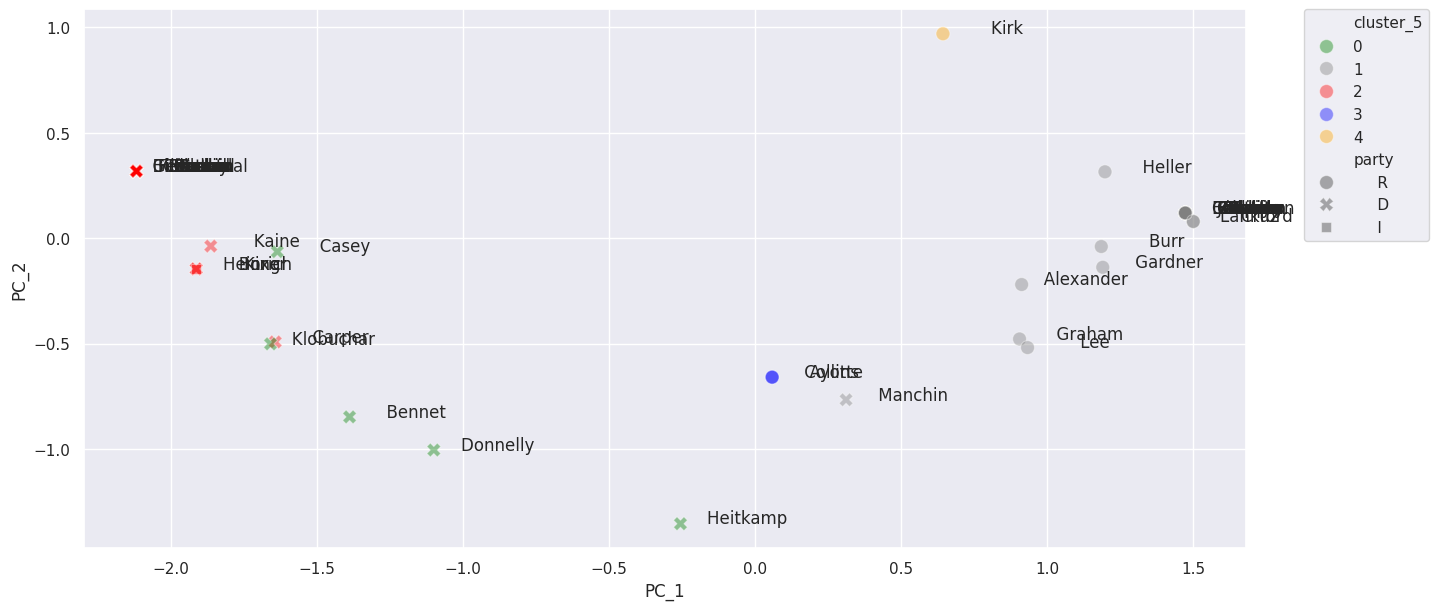

In [352]:
#Keep cell
#based on https://honingds.com/blog/seaborn-scatterplot/

import seaborn as sns
plt.figure(figsize=(15,7))

sns.scatterplot(data = principal_df, x='PC_1', y='PC_2', hue='cluster_5',
                style='party', s=100, palette=['green','grey','red','blue','orange'], alpha=.40)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(principal_df.PC_1, principal_df.PC_2, principal_df.name, plt.gca())


Take some time now and investigate which senators are the outliers are by researching them online. Wikipedia is enough. Can you understand why they are clusters by themselves?

Let's ask Gemini to run PCA for congress_114_voting with two dimensions and visualise the data.

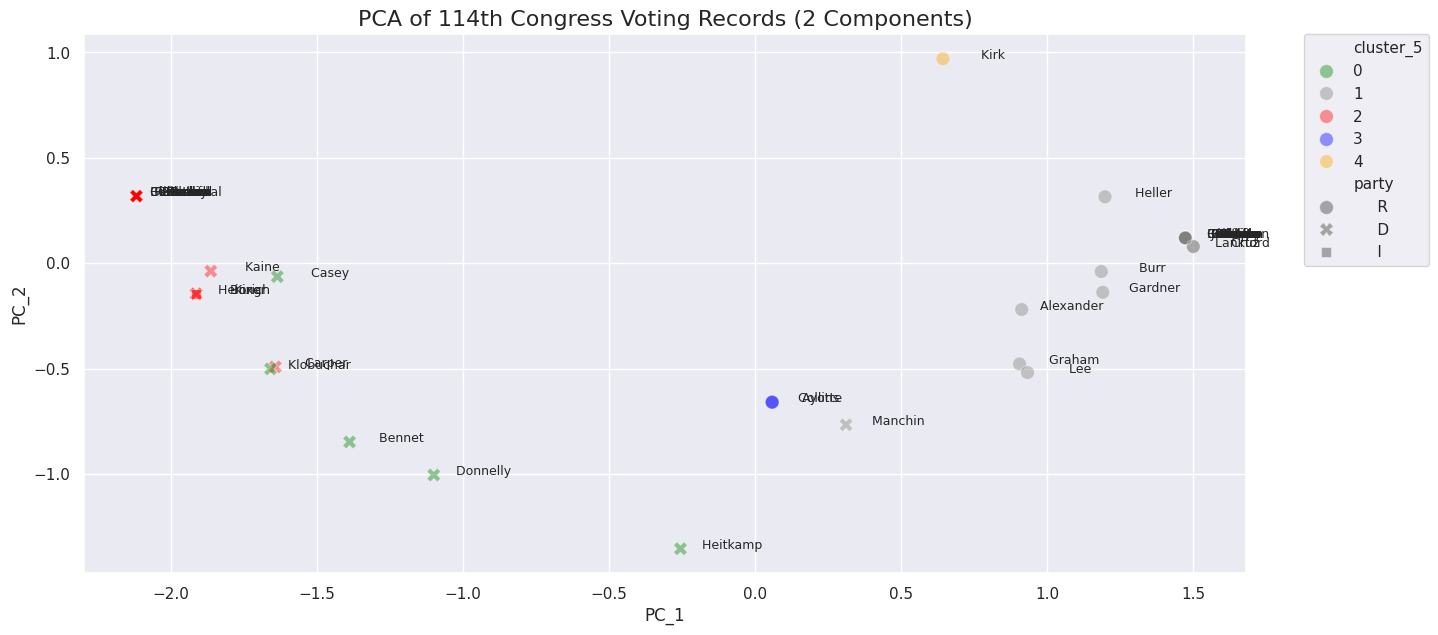

In [353]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- PCA (2 components) ----
pca = PCA(n_components=2)
principal_components = pca.fit_transform(congress_114_voting)

# ---- Create PCA dataframe ----
principal_df = pd.DataFrame(principal_components, columns=['PC_1', 'PC_2'])
principal_df['name'] = congress_114_result.name.values
principal_df['party'] = congress_114_result.party.values
principal_df['cluster'] = congress_114_result.cluster.values
principal_df['cluster_5'] = congress_114_result.cluster_5.values

plt.figure(figsize=(15, 7))

sns.scatterplot(
    data=principal_df,
    x='PC_1',
    y='PC_2',
    hue='cluster_5',
    style='party',
    s=100,
    palette=['green', 'grey', 'red', 'blue', 'orange'],
    alpha=0.40
)

plt.title("PCA of 114th Congress Voting Records (2 Components)", fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

def label_point(x, y, labels, ax):
    df = pd.concat({'x': x, 'y': y, 'label': labels}, axis=1)
    for _, row in df.iterrows():
        ax.text(row['x'] + 0.02, row['y'], str(row['label']), fontsize=9)

label_point(principal_df.PC_1, principal_df.PC_2, principal_df.name, plt.gca())
plt.show()


Nice. For me, it is already very close to what we have created manually.

Bonus: Go online or ask Gemini and research how to interpret PCA graphs with two dimensions? There are some common pitfalls to avoid ...

### Determine the optimal number of parties in the Senate according to k-means

So what would be the optimal number of parties in the senate? In terms of k-means, we need to determine the optimal `k`. There are quite a few methods to estimate `k`. Among the best known ones is the elbow method that is based on visualising trials with several k's: https://pythonprogramminglanguage.com/kmeans-elbow-method/.

The elbow method is a useful graphical tool to estimate the optimal number of clusters `k` for a given task. Intuitively, we can say that, if `k` increases, the within-cluster 'Sum of Squared Errors' (SSE; also called 'distortion') will decrease. SSE is the sum of the squared differences between each observation and its group's mean: https://hlab.stanford.edu/brian/error_sum_of_squares.html.

The idea behind the elbow method is to identify the value of `k` where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of `k`.

To perform the elbow method, we need to run several k-means, increment `k` with each iteration until we reach `max_k = 10` - and record the SSE-score in a list called sse. Then, map the SSE for each iteration to find the point for curve bends, the elbow. This will be the best `k`.

You could try this yourself, ask Gemini, or simply run the cells below. Don't forget to try and understand the code. You should recognize most of its components?

In [354]:
#Keep cell

max_k = 10
sse = []

for k in range(1, max_k):
    kmeans_ = KMeans(n_clusters = k)
    kmeans_.fit(congress_114_voting)
    sse.append(kmeans_.inertia_)

Run the code below to visualise the elbow ...

<Axes: xlabel='Number of Clusters', ylabel='SSE'>

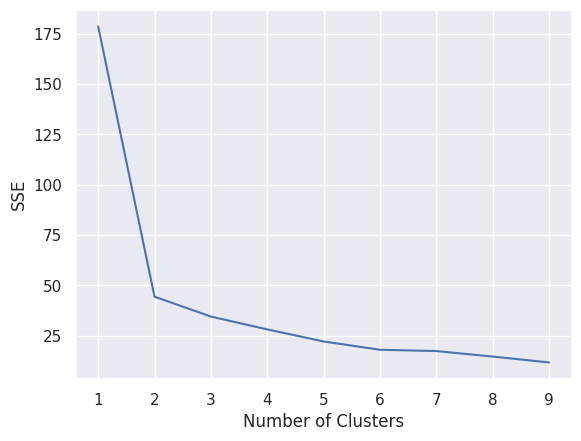

In [355]:
#Keep cell
sns.set(style='darkgrid')

elbow_df  = pd.DataFrame(list(zip(range(1, max_k), sse)),
              columns = ['Number of Clusters', 'SSE'])


sns.lineplot(x = 'Number of Clusters', y = 'SSE', data = elbow_df)

As you can see 2 is already the best answer ...

You can now continue playing with different k values if you want.

Before we move on, please finally consider https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means.

The discussion describes that, while clustering (and other machine-learning algorithms) can produce very persuasive results, these do not come for free. They are no free lunch. The results always depend on the assumptions we add like the number of clusters in k-means but also how we describe the vote in the US Congress, how we measure somebody's influence, etc. This is the famous 'No Free Lunch Theorem' in machine learning: https://en.wikipedia.org/wiki/No_free_lunch_theorem.

The theorem also applies to supervised machine learning, which we will practice again for the rest of the workshop.

But first ask Gemini to create an elbow graph for k-means with `congress_114_voting`.

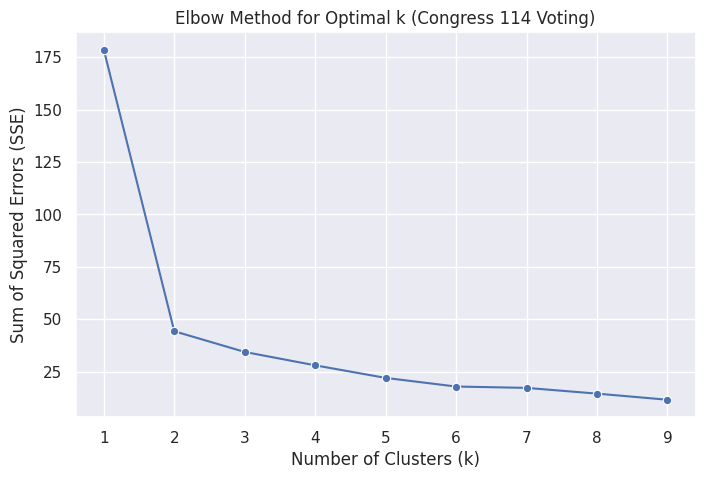

In [356]:
#Keep cell
sns.set(style='darkgrid')

# Create a DataFrame from the SSE values
elbow_df = pd.DataFrame(
    list(zip(range(1, max_k), sse)),
    columns=['Number of Clusters', 'SSE']
)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
sns.lineplot(x='Number of Clusters', y='SSE', data=elbow_df, marker='o')
plt.title("Elbow Method for Optimal k (Congress 114 Voting)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(range(1, max_k))
plt.show()


## Supervised Machine Learning

In the lecture, we explored how neural networks can be used to predict danceability. However, when working with structured, tabular data — such as spreadsheet-like or database-style datasets (https://en.wikipedia.org/wiki/Structured_data) — decision trees or their ensemble variants, like Random Forests (https://en.wikipedia.org/wiki/Decision_tree), are often more effective. These models have been around for a long time, yet they continue to deliver excellent performance on structured data. That's why now is a great time to learn about them. In fact, when dealing with structured data, Random Forests should often be your go-to model.

As part of this exercise, you'll revisit the key steps of the machine-learning process. We begin with data preprocessing.


### Data Preparation

Let's start with recreating the relevant dataframe `music_df`. Run the cell below.

In [357]:
#Keep cell
DANCEABILITY_THRESHOLD = 0.6 # Let's say songs with danceability >= 0.6 are "High Danceability"

music_raw_df = pd.read_csv('spotify-dataset.csv')
music_raw_df['dance_label'] = np.where(music_raw_df['danceability'] >= DANCEABILITY_THRESHOLD, 1, 0)

feature_cols = [
    'valence', 'liveness', 'tempo', 'acousticness', 'energy', 'speechiness', 'instrumentalness', 'loudness', 'popularity'
]
feature_cols = feature_cols + ['dance_label']
music_df = music_raw_df[feature_cols].copy()

music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           114000 non-null  float64
 1   liveness          114000 non-null  float64
 2   tempo             114000 non-null  float64
 3   acousticness      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   speechiness       114000 non-null  float64
 6   instrumentalness  114000 non-null  float64
 7   loudness          114000 non-null  float64
 8   popularity        114000 non-null  int64  
 9   dance_label       114000 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 8.7 MB


Do you remember how to show the first rows of `music_df`?

In [358]:
music_df.head()

,valence,liveness,tempo,acousticness,energy,speechiness,instrumentalness,loudness,popularity,dance_label
0,0.715,0.3580,87.917,0.0322,0.4610,0.1430,0.000001,-6.746,73,1
1,0.267,0.1010,77.489,0.9240,0.1660,0.0763,0.000006,-17.235,55,0
2,0.120,0.1170,76.332,0.2100,0.3590,0.0557,0.000000,-9.734,57,0
3,0.143,0.1320,181.740,0.9050,0.0596,0.0363,0.000071,-18.515,71,0
4,0.167,0.0829,119.949,0.4690,0.4430,0.0526,0.000000,-9.681,82,1


Looking back at our neural-network example, the next step should be to apply min-max-scaling to prepare the machine learning. In the example, we first did it manually. sklearn does a much better job at this, with `MinMaxScaler`. Check out https://scikit-learn.org/stable/modules/preprocessing.html.

We first import the `MinMaxScaler` class from sklearn's preprocessing module and create an instance of the scaler by calling `MinMaxScaler()`.

Next, we make a copy of our data to create `music_normalized_df`.

Finally, we fit the scaler to our data by calling `fit_transform()` on our training set `music_normalized_df`. This step applies the scaling transformation to each feature based on the previously calculated min and max values. Please, note that we should normally only fit the scaler with the training data to avoid leakage of data to test (https://en.wikipedia.org/wiki/Leakage_(machine_learning)), but we ignore this here for demonstration purposes.

BTW, according to the documentation, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html is another version of the scaling, which we have employed for the `teens` dataset without the help of sklearn.

Run the next cell.

In [359]:
#Keep cell

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

music_normalized_df = music_df.copy()
music_normalized_df.iloc[:,:-1] = scaler.fit_transform(music_normalized_df.iloc[:,:-1])

music_normalized_df.head()

/tmp/ipython-input-530221691.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.73 0.55 0.57 ... 0.22 0.41 0.22]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  music_normalized_df.iloc[:,:-1] = scaler.fit_transform(music_normalized_df.iloc[:,:-1])


,valence,liveness,tempo,acousticness,energy,speechiness,instrumentalness,loudness,popularity,dance_label
0,0.718593,0.3580,0.361245,0.032329,0.4610,0.148187,0.000001,0.791392,0.73,1
1,0.268342,0.1010,0.318397,0.927711,0.1660,0.079067,0.000006,0.597377,0.55,0
2,0.120603,0.1170,0.313643,0.210843,0.3590,0.057720,0.000000,0.736123,0.57,0
3,0.143719,0.1320,0.746758,0.908635,0.0596,0.037617,0.000071,0.573701,0.71,0
4,0.167839,0.0829,0.492863,0.470884,0.4430,0.054508,0.000000,0.737103,0.82,1



Let's run a test that we normalized everthing correctly.

In [360]:
# Run this cell to test your code...

cond_ = np.isclose(music_normalized_df.iloc[0,0], 0.7186) and np.isclose(music_normalized_df.iloc[1,1], 0.101)
assert cond_, f'Test failed'
print('All tests passed!')

All tests passed!


As a little exercise, try the same thing with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html. Copy the code above but now use `MaxAbsScaler`.

Create and print out `music_normalized_df2` as you have done for `music_normalized_df`.

In [361]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

music_normalized_df2 = music_df.copy()
music_normalized_df2.iloc[:,:-1] = scaler.fit_transform(music_normalized_df2.iloc[:,:-1])

music_normalized_df2.head()

/tmp/ipython-input-2144779745.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.73 0.55 0.57 ... 0.22 0.41 0.22]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  music_normalized_df2.iloc[:,:-1] = scaler.fit_transform(music_normalized_df2.iloc[:,:-1])


,valence,liveness,tempo,acousticness,energy,speechiness,instrumentalness,loudness,popularity,dance_label
0,0.718593,0.3580,0.361245,0.032329,0.4610,0.148187,0.000001,-0.136198,0.73,1
1,0.268342,0.1010,0.318397,0.927711,0.1660,0.079067,0.000006,-0.347964,0.55,0
2,0.120603,0.1170,0.313643,0.210843,0.3590,0.057720,0.000000,-0.196523,0.57,0
3,0.143719,0.1320,0.746758,0.908635,0.0596,0.037617,0.000071,-0.373806,0.71,0
4,0.167839,0.0829,0.492863,0.470884,0.4430,0.054508,0.000000,-0.195453,0.82,1


In [362]:
q6.hint()
q6.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Import MaxAbsScaler from sklearn.preprocessing to normalize your data. MaxAbsScaler scales features to [-1, 1] range by dividing by the maximum absolute value. Steps: 1) Create scaler, 2) Copy DataFrame, 3) Transform all columns except the last (target), 4) Display result.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
from sklearn.preprocessing import MaxAbsScaler
scaler2 = MaxAbsScaler()
music_normalized_df2 = music_df.copy()
music_normalized_df2.iloc[:,:-1] = scaler2.fit_transform(music_normalized_df2.iloc[:,:-1])
music_normalized_df2.head()
```

Can you see any differences?

Actually, we do not need to normalize the data for decision trees and random forests. For these models, we just need to make sure that they preserve the order. You will later see why when we discuss the inner workings of these algorithms.

We can thus continue working with `music_df`. Do you remember from the lecture what we want to do with this dataset? How do we beat music experts to understand danceability?

Once we are happy with the data we have, we create a training and test dataset.

Complete the cell below.

In [363]:
#Complete the cell

from sklearn.model_selection import train_test_split

#With random_state=42, we select the same test and training dataset for the random splits.
train_set, test_set = train_test_split(music_df, test_size=0.2, random_state=42)

In [364]:
q7.check()
#q7.hint()
q7.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
train_set, test_set = train_test_split(music_df, test_size=0.2, random_state=42)
```

### The Workings of Decision Trees (optional)

In this workshop, we learn more about supervised learning and in particular powerful methods for structured data. We apply what we have seen in the lecture, but we also move on to new and different data and explore decision trees in more detail.

Feel free to skip this section at first and continue with the sections on sklearn's decision trees below. This part is mainly to understand the inner workings of these important algorithms, while in practice you will use the sklearn version directly.

Decision trees are rule-based algorithms (https://en.wikipedia.org/wiki/Decision_tree). This means, they find rules through so-called splits across the various features of the dataset. They optimise which feature to select at which cut-off point to get the best possible split of the dataset according to the target. Let's see what this means in practice by going through the splits one step a time.

As we do not know anything about the data yet, we simply decide that we want to split the data based on the first column/feature. It seems also like a good initial strategy to split according to the mean-value of the column. Can you determine in the next cell what the mean-value of `train_set['valence']` is? There is an `np` function for that!

In [365]:
np.mean(train_set['valence'])

np.float64(0.4738988724780702)

In [366]:
q8.hint()
q8.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Calculate the mean (average) of the 'valence' feature in your training set. Use np.mean() function: np.mean(dataframe['column_name']). This gives you a baseline value for the valence feature.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
np.mean(train_set['valence'])
```

You should get ~0.47. Let's visualise the effects of a split on this column with the Seaborn library.

Run the next cell to test this split on `test_set`.

*Important*: You might get slightly different values for all the exercises because we work with random datasets. This is because your `test_set` might look differently. It is a good exercise to adjust the visualisation code accordingly.


[Text(0.5, 1.0, 'Histogram of valence')]

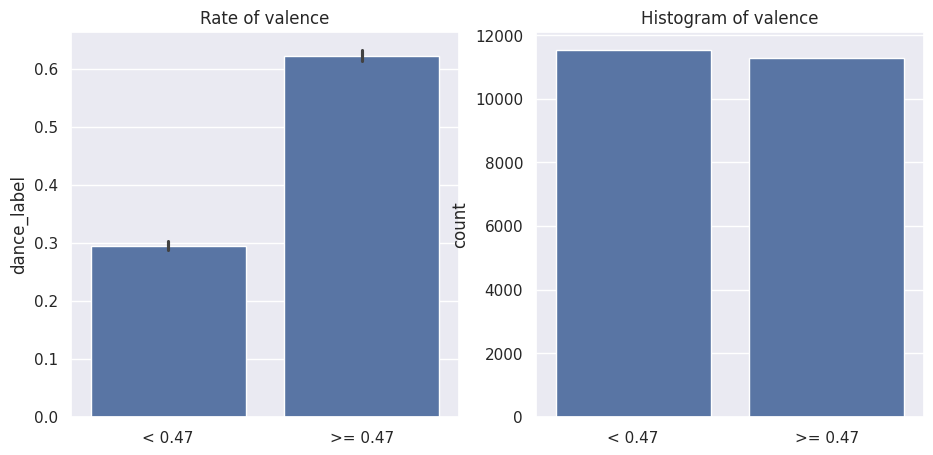

In [367]:
#Keep cell

import seaborn as sns

mean_valence = np.where(test_set['valence'] < 0.47, '< 0.47', '>= 0.47')

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=test_set, y="dance_label", x=mean_valence, ax=axs[0]).set(title="Rate of valence")
sns.countplot(data=test_set, x=mean_valence, ax=axs[1]).set(title="Histogram of valence")

The plot visually explores the relationship between a `valence` feature split at 0.47 and `dance_label` in the test dataset. The bar plot on the left shows the proportion of 'High Danceability' songs within each `valence` category, while the count plot on the right shows the distribution of songs across these `valence` categories. On the left, we see that the rate of 'High Danceability' differs fairly strongly between songs with low `valence` (< 0.47) and high `valence` (>= 0.47) in the test set. On the right, the number of songs in the test dataset are shown that fall into each `valence` category ('< 0.47' and '>= 0.47'). It shows that they are evenly distributed. This helps understand if `valence` (and the split at 0.47) is a good predictor for danceability and how many songs fall into each category. This is a step towards understanding potential split points for a decision tree. As the rate of valence is very uneven, we suspect that splitting `valence` at 0.47 is not a great split. Let's investigate further ...

We now create a very simple model, which simply says that music of `valence` less than 0.47 is good (which equals to true in our case), while the ones above that value are bad. To do so, we evaluate with our `test_set` to see how accurate this approach turns out to be.

In [368]:
#Keep cell
preds = test_set['valence'].values < 0.47
preds = preds.astype(int)
preds

array([1, 1, 1, ..., 0, 1, 0])

Let's check this with yet another metrics so that we learn a little more. Mean absolute error (MAE; https://en.wikipedia.org/wiki/Mean_absolute_error) measures the absolute error difference between the prediction and the actual value. In our case, the absolute error would be 0 if the predicted value corresponds to the actual one and 1 otherwise.

Complete the next cell.

In [369]:
#Complete cell

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set['dance_label'], preds)

0.664298245614035

In [370]:
q9.hint()
q9.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Import and use mean_absolute_error from sklearn.metrics to evaluate model performance. MAE measures average absolute difference between predictions and actual values. Syntax: mean_absolute_error(actual_values, predicted_values)

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set['dance_label'], preds)
```

I am getting something like 0.66, which is not great. MAE of ~0.66 indicates many errors, as expected for a single, simple split.

Alternatively, we could try another column. Finish the code below for the same split analysis using the column 'liveness'.

In [371]:
#Complete cell
mean_liveness = np.mean(train_set['liveness'])
preds = (test_set['liveness'].values < mean_liveness).astype(int)
print('Preds: ', preds)
print('Mean absolute error: ', mean_absolute_error(test_set['dance_label'], preds))

Preds:  [1 0 1 ... 0 0 1]
Mean absolute error:  0.4657017543859649


In [372]:
q10.hint()
q10.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Create a simple baseline model using the 'liveness' feature. Steps: 1) Calculate mean liveness from training set, 2) Predict 1 if test liveness < mean, else 0, 3) Convert boolean to int with .astype(int), 4) Calculate MAE to evaluate performance.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
mean_liveness = np.mean(train_set['liveness'])
preds = (test_set['liveness'].values < mean_liveness).astype(int)
print('Preds: ', preds)
print('Mean absolute error: ', mean_absolute_error(test_set['dance_label'], preds))
```

This looks better. Why?

Let's run a quick test that we are doing what we are supposed to be doing.

In [373]:
# Run this cell to test your code...
assert mean_absolute_error(test_set['dance_label'], preds) > 0.4, f'Test failed'
print('All tests passed!')

All tests passed!


Let's speed things up and try several columns and splits at the same time.

We create a function `score_` to test how a split on a column affects the overall model we want to build. As we want to move slowly towards decision trees, we do not simply split on a column's average but on a measure called impurity (https://en.wikipedia.org/wiki/Decision_tree_learning). Impurity indicates how the two groups that a split creates are similar or dissimilar from each other. The smaller impurity is the better the split. We call these groups `left_group` and `right_group`.

How do we measure group similarity? Similarity is often the big question in data analytics. In this case, we take the standard deviation of the target, which is `dance_label`. If you don't remember standard deviation from school, it is basically a measure of the amount of variation of values (https://en.wikipedia.org/wiki/Standard_deviation). Can you see where in the code below?

Standard deviation or `std()` is thus a measure of the spread of two groups. If it is higher, the groups are more dissimilar. Then, we multiply by the number of data items in the groups, because a bigger group has more impact.

We do this twice for both the left and the right split.

In [374]:
#Keep cell
#The aim of score_ is to use a particular split point in a target variable to create similar groups according to the target column.

def score_(column_values, target_values, split_point):
    left_group_score = 0
    right_group_score = 0

    left_mask = column_values < split_point
    left_count = left_mask.sum()
    if left_count <= 1:
        left_group_score = 0
    else:
        left_group_score = target_values[left_mask].std() * left_count

    right_mask = column_values >= split_point
    right_count = right_mask.sum()
    if right_count <= 1:
        right_group_score = 0
    else:
        right_group_score = target_values[right_mask].std() * right_count

    return (left_group_score + right_group_score) / len(target_values) if len(target_values) > 0 else 0



Run `score_` with mean `valence` in the cell below. Observe how `score_` operates on `train_set` to find the best splits and then is tested with `test_set`. The splits are learned from training data and `test_set` is used only for evaluation.

In [375]:
#Keep cell
mean_valence = np.mean(train_set['valence'])
print(score_(test_set['valence'].values, test_set['dance_label'].values, mean_valence))

0.47028525302390556


Please complete the code below for `acousticness`.

In [376]:
#Complete cell

mean_acousticness = np.mean(train_set['acousticness'])
print(score_(test_set['acousticness'].values, test_set['dance_label'].values, mean_acousticness))

0.4961410009002029


In [377]:
q11.hint()
q11.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Test the 'acousticness' feature using your custom score_ function. Calculate the mean acousticness from training data, then use score_() to evaluate how well this threshold separates the dance_label classes.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
mean_acousticness = np.mean(train_set['acousticness'])
print(score_(test_set['acousticness'].values, test_set['dance_label'].values, mean_acousticness))
```

The scores are close, but mean valence seems to be a better split because the score is lower. Still not great but better.

Let's play a bit and experience Jupyter notebook's interactive tools (https://jupyterbook.org/en/stable/interactive/interactive.html).

Run the cell below and move the slider for different feature values.

Please, note that we use the min_max scaled version of `music_df`, as the interaction widget is then easier to move. But the same behaviour could be observed with `train_set` and `test_set`.

In [378]:
#Keep cell
from ipywidgets import interact
def score__(nm, split):
    col = music_normalized_df[nm]
    return float(score_(col, music_normalized_df['dance_label'].values, split))


interact(nm=list(music_normalized_df.columns[:-1]), split=0.5)(score__);

interactive(children=(Dropdown(description='nm', options=('valence', 'liveness', 'tempo', 'acousticness', 'ene…

As you can see, we can now use different values for the splits than the means only. Which ones increase the score and reduce impurity?

Interesting, but also slow and not particularly automated. Let's use the computer to automatically find the best split point for a column.

To find the best splits, we need to first find a number of unique split points. Let's try this for the first column `valence`. The code uses the `unique()` function from Pandas and then sorts the values with `sorted()`. Check in the documentation what these functions do.

At the end, we print out only the first 15 `unq` values.

In [379]:
#Keep cell
col_ = 'valence'
unq = train_set[col_].unique()
[float(u) for u in sorted(unq)[:15]]

[0.0,
 1e-05,
 0.000322,
 0.000378,
 0.000667,
 0.000673,
 0.000755,
 0.000885,
 0.00104,
 0.00115,
 0.00119,
 0.00122,
 0.00142,
 0.00149,
 0.00154]

Let's score with these values. Run the cell below and check out what `argmin()` does in the documentation or ask Gemini. It looks for the smallest value and returns its index in a list.

In [380]:
#Keep cell
scores = np.array([score_(train_set[col_], train_set['dance_label'], o) for o in unq if not np.isnan(o)])
print(unq[scores.argmin()])

0.427


For this column, 0.427 seems to be the best cut-off for the splits.

A typical move in data analysis with Jupyter notebooks is to bring various cells together into one function to run them together. Let's define `min_column` using the previous two cells.

Complete the cell below.

In [381]:
#Complete cell

def min_column(df, col_):
    df = df.sample(frac=0.1, random_state=4711) # For demonstration purposes, we take a sample of train_set to find the min column
    unq = df[col_].dropna().unique()
    s = np.array([score_(df[col_], df['dance_label'], o) for o in unq if not np.isnan(o)])
    idx = s.argmin()
    return (col_, float(unq[idx]), float(s[idx]))

min_column(train_set, 'valence')

('valence', 0.516, 0.4719881045859959)

In [382]:
q12.hint()
q12.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Define a function to find the optimal threshold for any feature column. The function should: 1) Sample data for efficiency, 2) Test all unique values as thresholds, 3) Calculate score for each, 4) Return the feature name, best threshold, and best score.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
def min_column(df, col_):
    df = df.sample(frac=0.1, random_state=4711) 
    unq = df[col_].dropna().unique()
    s = np.array([score_(df[col_], df['dance_label'], o) for o in unq if not np.isnan(o)])
    idx = s.argmin()
    return (col_, float(unq[idx]), float(s[idx]))

min_column(train_set, 'valence')
```

For all columns, we print out the name of the column, the split value and the impurity - ignoring the last column, which is `dance_label`, with the index -1.

Complete the next cell.

In [383]:
#Complete cell

for w in list(train_set.columns[:-1]):
    print(min_column(train_set, w))

('valence', 0.516, 0.4719881045859959)
('liveness', 0.115, 0.49542334176297104)
('tempo', 146.148, 0.48883025896626137)
('acousticness', 0.000546, 0.48622559857429914)
('energy', 0.928, 0.48864687541143037)
('speechiness', 0.0477, 0.4946339211768741)
('instrumentalness', 4.88e-05, 0.4964795504995157)
('loudness', -16.631, 0.4904265663869588)
('popularity', 16.0, 0.4972431875771007)


In [384]:
q13.hint()
q13.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Apply the min_column function to all feature columns (excluding the target 'dance_label'). Use a for loop to iterate through train_set.columns[:-1] (all columns except the last). This will show you the best threshold for each feature.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
for w in list(train_set.columns[:-1]):
    print(min_column(train_set, w))
```

According to my output, `valence <= 0.516` is the best split we can use. Why? Because it has the smallest value of impurity.

We have (almost) re-invented the OneR machine-learning algorithms (https://rasbt.github.io/mlxtend/user_guide/classifier/OneRClassifier/ or https://christophm.github.io/interpretable-ml-book/rules.html). It's not very popular anymore but was very much used in the 1990s. It often provides a great baseline to compare more advanced models with. We can think of OneR and what we have done as a one-rule tree.

How about we add another split after the first one with `valence`? We first pick the best split for `valence` and then find the best split for each of the two subgroups this split produces. To this end, we just have to repeat the previous step for each of the two groups based on a split of `valence <= 0.516`.

Let's do this split first by running the next cell.

In [385]:
#Keep cell
left_split_valence = train_set.loc[train_set['valence'] <= 0.516, :]
right_split_valence = train_set.loc[train_set['valence'] > 0.516, :]

Let's repeat the previous step first for `left_split_valence`.
To this end, we have to remove both the 'valence' and the 'music_label', as we do not want to split over valence again and do not need the target column.

Run the cell below.

In [386]:
#Keep cell
left_split_valence_columns = [c for c in left_split_valence.columns if c not in ['valence', 'dance_label']]
for w in left_split_valence_columns:
    print(min_column(left_split_valence, w))

('liveness', 0.684, 0.46030411887124045)
('tempo', 134.064, 0.4519317358181973)
('acousticness', 0.00054, 0.454307020554023)
('energy', 0.936, 0.45385498992533885)
('speechiness', 0.0439, 0.45691388257256593)
('instrumentalness', 0.968, 0.46069629229051096)
('loudness', -20.66, 0.45309155941105783)
('popularity', 40.0, 0.46047629786889044)


The best next split uses `tempo`.

Now, repeat the same for `right_split_valence`.

Complete the next cell.

In [387]:
#Complete cell
right_split_valence_columns = [c for c in right_split_valence.columns if c not in ['valence', 'dance_label']]
for w in right_split_valence_columns:
    print(min_column(right_split_valence, w))

('liveness', 0.187, 0.4728465054460742)
('tempo', 136.129, 0.4631669939754432)
('acousticness', 0.00429, 0.4703610937805328)
('energy', 0.886, 0.47219219715573724)
('speechiness', 0.122, 0.4740377645078304)
('instrumentalness', 0.95, 0.47844270610273715)
('loudness', -15.348, 0.4783880860138279)
('popularity', 18.0, 0.4760608153322013)


In [388]:
q14.hint()
q14.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> After splitting on 'valence', find the best features for the right split subset. First, get column names excluding 'valence' and 'dance_label', then apply min_column to each. This implements a simple decision tree approach by finding the next best split.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
right_split_valence_columns = [c for c in right_split_valence.columns if c not in ['valence', 'dance_label']]
for w in right_split_valence_columns:
    print(min_column(right_split_valence, w))
```

What would be the next best split from the existing right split?

The best split would be `tempo`. We could continue this for the four subsubgroups we have now and then repeat again and again the splits to build a decision tree.

Let's run a test that we got everything right up to now.

In [389]:
# Run this cell to test your code...
assert min_column(right_split_valence, 'energy')[1]>0.8, f'Test failed'
print('All tests passed!')

All tests passed!



By increasingly adding these splits, we have created a decision tree. The model will start with the valence of music tracks and then add additional splits or rules until there are no more better splits.

We do not want to do this now and rather use sklearn's `DecisionTreeClassifier` to do it for us.

### Sklearn's Decision Trees

For sklearn's decision trees, we need to create `X_train`, `y_train`, etc.

Complete the next cell.

In [390]:
#Complete cell

X_train = train_set.loc[:, train_set.columns != 'dance_label'].values
y_train = train_set['dance_label'].values

X_test = test_set.loc[:, test_set.columns != 'dance_label'].values
y_test = test_set['dance_label'].values

In [391]:
q15.check()
#q15.hint()
q15.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
X_train = train_set.loc[:, train_set.columns != 'dance_label'].values
y_train = train_set['dance_label'].values
X_test = test_set.loc[:, test_set.columns != 'dance_label'].values
y_test = test_set['dance_label'].values
```

Complete the code below to set up the model.

Tip: `max_leaf_nodes=4` limits the size of the tree.

In [392]:
#Complete cell
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_leaf_nodes=4, random_state=4711).fit(X_train, y_train)

In [393]:
q16.check()
#q16.hint()
q16.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_leaf_nodes=4, random_state=4711).fit(X_train, y_train)
```

Draw the resulting tree for X_train. Before running this cell you might have to install graphviz on your system - if you are not on Colab: https://www.graphviz.org/download/.

Run the cell below.

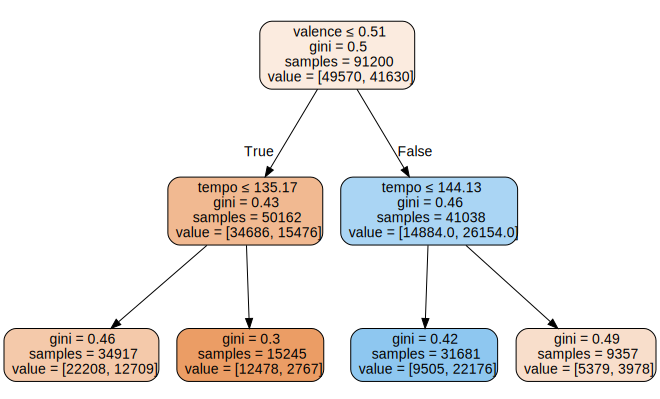

In [394]:
#Keep cell
import graphviz, re
from sklearn.tree import export_graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s = export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True, special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

draw_tree(model, train_set.iloc[:,:-1], size=10)

For me, these are the same splits that I have found earlier, although sklearn uses a different impurity measure than our simple one. It uses the 'gini' impurity measure.

Each node contains information about the number of 'samples' or rows in the dataset that match the split. It shows as 'values' how many of these samples have as values 'bad' or 'good' danceability.

But what is 'gini'? It is just another measure of impurity - very similar to our own home-made score. It is defined as follows:

In [395]:
#Keep cell
def gini(dataset, cond):
    act = dataset.loc[cond, 'dance_label']
    return (1 - act.mean()**2 - (1-act).mean()**2)

This calculates the probability that, if you pick two rows from a group, you will get the same danceability. If the group is all the same, the probability is 1.0, and 0.0 if they're all different. So, in this case the higher the outcome the better the split.

Let us try this for `valence`.

In [396]:
#Keep cell
float(gini(train_set, train_set['valence'] <= 0.4)), float(gini(train_set, train_set['valence'] <= 0.51))

(0.3941659161687432, 0.42826292797416965)

`train_set['valence'] <= 0.51` is the better split with the higher gini value. This corresponds to the gini values in the above visualisation.

Gini can be a bit complicated at first. So, as long as you remember that it is about impurities of the subgroups, you will be fine. Gini is often the default way of repeatedly splitting a decision tree as in our own example. So, you can just use it out of the box and don't need to change anything. But you need to always know a little bit about these measures - at least whether a higher or a lower value indicates a better split.

Let us see how the decision tree compares with our own model.

Complete the cell below.

In [397]:
#Complete cell

preds = model.predict(X_test)
mean_absolute_error(y_test, preds)

0.31298245614035086

In [398]:
q17.check()
#q17.hint()
q17.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
preds = model.predict(X_test)
mean_absolute_error(y_test, preds)
```

It is already better than the average liveness/valence models above, which had worse errors.

We can do even better if make the decision tree deeper. You might have noticed that our original sklearn decision tree had a parameter of `max_leaf_nodes=4`, which says we only want 4 leaf nodes. With `min_samples_leaf=25`, we can increase the size of the tree. These are the minimum number of samples required to be at a leaf node. Check out https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

Run the cell below.

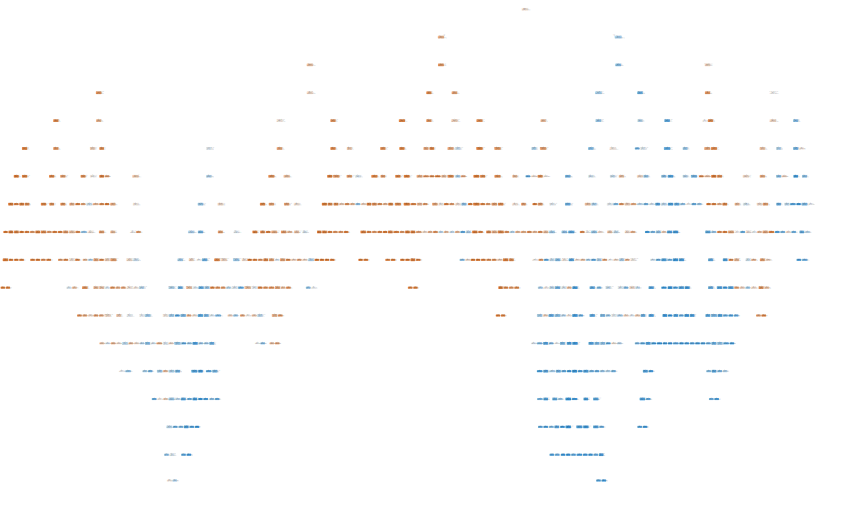

In [399]:
#Keep cell
model_2 = DecisionTreeClassifier(min_samples_leaf=200, random_state=4711)
model_2.fit(X_train, y_train)
draw_tree(model_2, train_set.iloc[:,:-1], size=12)

This looks impressively complex. Let us check out how the model does.

Complete the next cell to run an evaluation.

In [400]:
#Complete cell
preds = model_2.predict(X_test)
mean_absolute_error(y_test, preds)

0.2318859649122807

In [401]:
q18.check()
#q18.hint()
q18.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
preds = model_2.predict(X_test)
mean_absolute_error(y_test, preds)
```

A bit better, but does this justify the complexity? This is a decision we have to make.

Let's finally ask Gemini to create a training and test dataset for `music_df` with a train/test split of 0.2. Then, it should create a decision tree model and evaluate it with the mean absolute error.

In [402]:
# prompt: create training and test dataset for `music_df` with a test split of 0.2. Then, make a decision tree model and evaluate it with the mean absolute error

X_train, X_test, y_train, y_test = train_test_split(music_df.drop('dance_label', axis=1), music_df['dance_label'], test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.18552631578947368


Nice. This is what Gemini, GPT, etc. are really good at.

Let's try something else and introduce the algorithm RandomForest, which is still used for state-of-the-art modelling of structured data.

### Random Forest

We do not really want to make the decision trees much more complex than what we have just seen.

So, how can we go further from here? One idea was developed decades ago by Leo Breiman who suggested to create lots of trees and take the average of their predictions (Breiman, L. Random Forests. Machine Learning 45, 5-32 (2001). https://doi.org/10.1023/A:1010933404324).

Taking the average like this, is also known as 'bagging' and can be done with many different models. For this so-called 'ensemble' of decision trees (https://en.wikipedia.org/wiki/Ensemble_learning), we have a particular name and call it RandomForest.

The idea is to create random subsets from our data `music_df` and create uncorrelated models out of them. Using the average of these models' results, we should get a better estimation of the target value.

The following will create a decision tree from a random subset of the training data and repeats this for 100 trees, determining the average mean absolute error.

Run the two cells below.

In [403]:
#Keep cell
from numpy import random

X_train = train_set.loc[:, train_set.columns != 'dance_label'].values
y_train = train_set['dance_label'].values

X_test = test_set.loc[:, test_set.columns != 'dance_label'].values
y_test = test_set['dance_label'].values

def get_tree_model(prop=0.75):
    n = len(y_train)
    #ids are random choice of numbers
    ids = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(X_train[ids], y_train[ids])

In [404]:
#Keep cell

#Get 10 decision tree models
tree_models = []
for t in range(10): #create 10 trees
    tree_models.append(get_tree_model())

all_probs = []
for tm in tree_models:
    all_probs.append(tm.predict(X_test))

#Calculate the average predictin for each row by taking the mean
avg_probs = np.array(all_probs).mean(0)

mean_absolute_error(y_test, avg_probs)

0.2319342105263158

This is better than my decision tree, which we should expect. We are on a good track.

What we have just created, is done better with sklearn's `RandomForestClassifier`, which follows the same principles but better. `RandomForestClassifier` offers some extra tricks such as picking a random subset of columns for each split.

Let us create everything in one go with sklearn. Complete the following code by using the sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

In [405]:
#Complete cell
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(10, min_samples_leaf=5, random_state=4711)
rf.fit(X_train, y_train);
mean_absolute_error(y_test, rf.predict(X_test))

0.1599122807017544

In [406]:
q19.check()
#q19.hint()
q19.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(10, min_samples_leaf=5, random_state=4711)
rf.fit(X_train, y_train)
mean_absolute_error(y_test, rf.predict(X_test))
```

This is significantly better and better than my neural net from the lecture. As you can see, it is hard to beat an algorithm from 2001 for structured data analysis.

One more test.

In [407]:
# Run this cell to test your code...
cond_ = pd.Series(rf.feature_importances_, index=train_set.columns[:-1]).sort_values()[-1:].index.values[0]=='valence'
assert cond_, f'Test failed'
print('All tests passed!')

All tests passed!


Another nice aspect of random forests is they can tell us which inputs are most important for the predictions, using `feature_importances_`.

Let's try to re-implement the example https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html. We ignore the standard derivation discussion.

Complete the cell below.

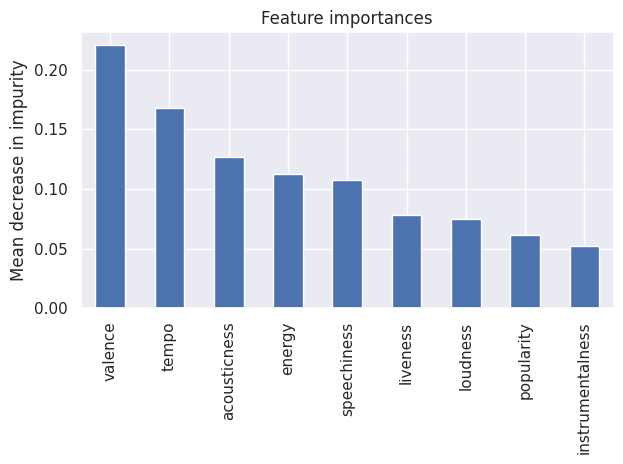

In [408]:
#Complete cell
import pandas as pd

forest_importances = pd.Series(rf.feature_importances_, index=train_set.columns[:-1])

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(ax=ax) #Sorting as well ...
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [409]:
q20.hint()
q20.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Visualize feature importance from the Random Forest model to understand which features are most predictive. Create a pandas Series from rf.feature_importances_ with column names as index, sort by importance, and create a bar plot. This shows which audio features matter most for predicting danceability.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
import pandas as pd
forest_importances = pd.Series(rf.feature_importances_, index=train_set.columns[:-1])
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(ax=ax) 
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
```

Valence, tempo and acousticness are the three most important features.

Valence is clearly dominating though. Let's have a quick look what a maximum combination of `valence` and `danceability` is. The next video is the song in the dataset with the maximum product of `valence` and `danceability`.

In [410]:
#Keep Cell
#Multiplying valence an danceability and then selecting the max of product  gives us ... Oh well ...

combined_example = "-RSIIu0WWcM"
display_youtube(combined_example, video_title="Example of most danceable music with highest valence")

Obviously the kids are dominating the dance charts ...

And of course, Gemini can also do everything we have done. Ask Gemini to "Create training and test dataset for `music_df` with a test split of 0.2. Then, make a random forest model and evaluate it with the mean absolute error. Finally, visualise the feature importance."

Mean Absolute Error: 10.5013


/tmp/ipython-input-109530568.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x="importance", y="feature", palette="viridis")


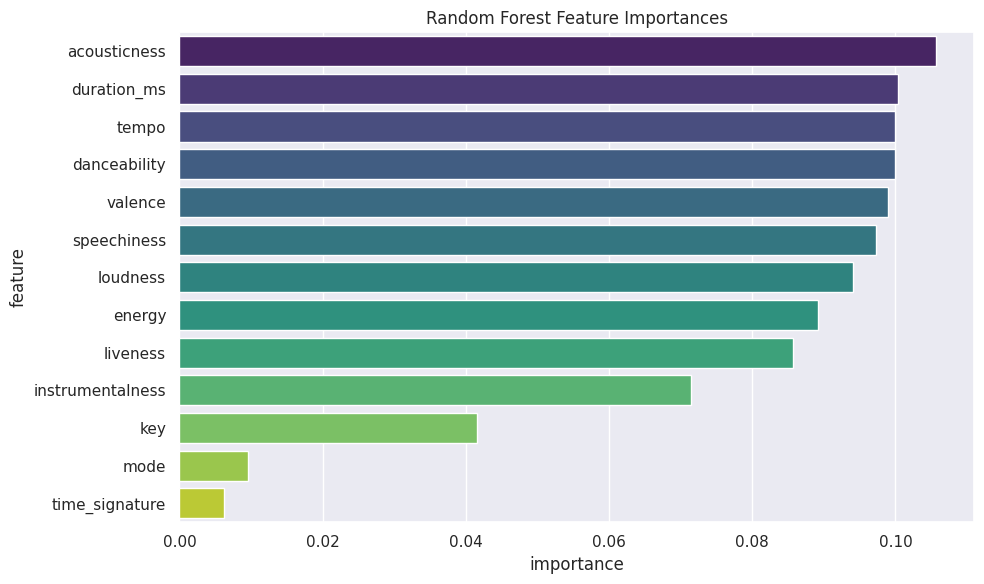

In [411]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
music_df = pd.read_csv("spotify-dataset.csv")

# Drop non-numeric or irrelevant columns if needed
# (Assuming target is 'popularity'; adjust if different)
target = "popularity"
features = music_df.drop(columns=[target])
X = features.select_dtypes(include=['float64', 'int64'])
y = music_df[target]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions and MAE
preds = rf.predict(X_test)
mae = mean_absolute_error(y_test, preds)

print(f"Mean Absolute Error: {mae:.4f}")

# -----------------------------
# Feature Importance Plot
# -----------------------------
importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importances, x="importance", y="feature", palette="viridis")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


Impressive! Why not practice more now at https://www.w3schools.com/python/python_ml_decision_tree.asp?

By understanding the principles of decision trees and random forests, you have a great option to analyse most structured data. I am proud of you.

That's it for machine learning 101! That was not too hard, was it?

### Save to html (uncomment to execute)